In [1]:
import matplotlib.pyplot as plt

def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [2]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

#### 奖励函数
* 起飞上限时间重设为 5 s，其他不变  

#### 调 memory 回放参数
* sample_size=100
* 取样概率：[前1/4：70%；1/4-1/2：20%； 后1/2：10%]

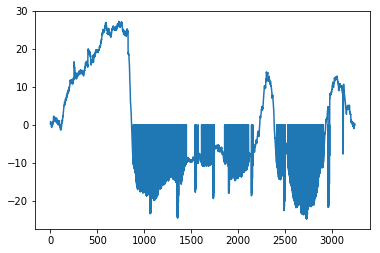

In [5]:
plot_action_cruve("actions_hover_01.txt")

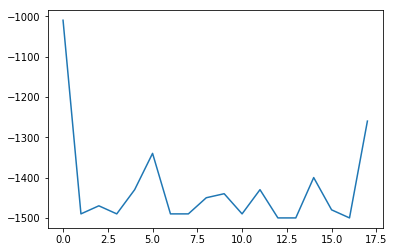

In [6]:
plot_rewards("rewards_hover_01.txt")

* sample_size 调为70

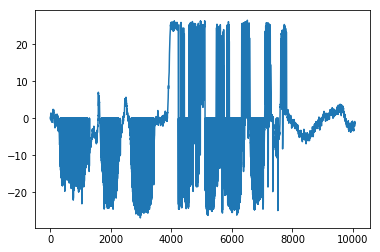

In [7]:
plot_action_cruve("actions_hover_02.txt")

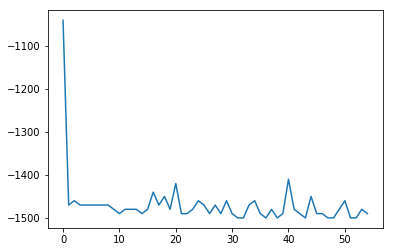

In [8]:
plot_rewards("rewards_hover_02.txt")

对比发现 sample_size 设为100较好，动作变化更平缓，暂定为100

#### 调Actor模型

* 增加一层 hidden layer (nodes=128)

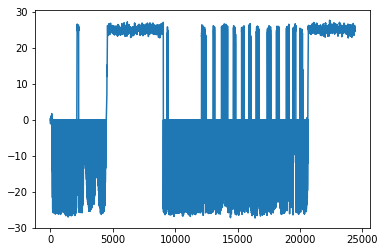

In [11]:
plot_action_cruve("actions_hover_04.txt")

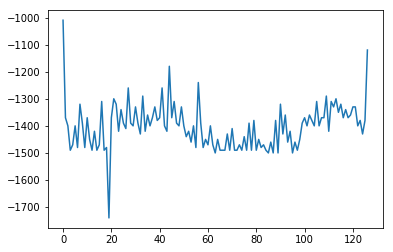

In [12]:
plot_rewards("rewards_hover_04.txt")

* 调回原有的层数（3层hidden layer)，节点数减少：16-32-16

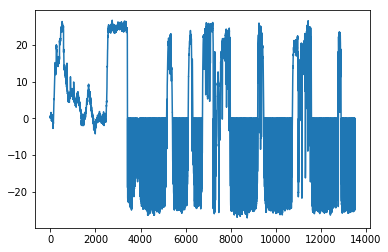

In [14]:
plot_action_cruve("actions_hover_05.txt")

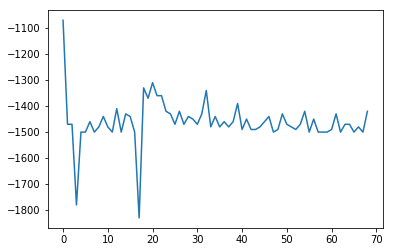

In [15]:
plot_rewards("rewards_hover_05.txt")

尝试再次调整奖励函数，取消起飞限制和高度极限，但效果不佳  

仍旧采用原方案

#### 继续改进Actor和Critic模型 (参考DDPG原论文)
* 重设优化器Adam 的学习率 ：Actor 10(-4) ; Critic 10(-3)

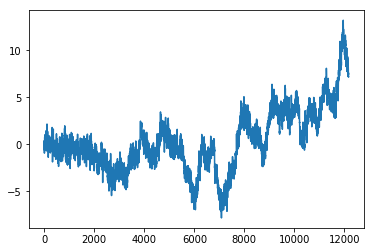

In [26]:
plot_action_cruve("actions_hover_06.txt")

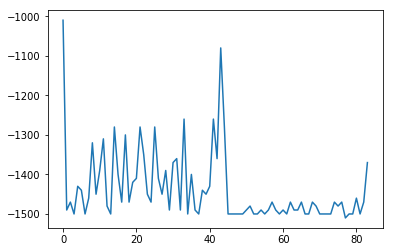

In [27]:
plot_rewards("rewards_hover_06.txt")

变化很明显，输出的动作变化幅度降低，很少出现突变，但推力无法达到起飞阈值，且变化频率依然很高
* 先把 actor的节点数量恢复原有设定（32-64-32）


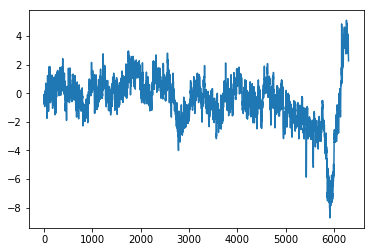

In [28]:
plot_action_cruve("actions_hover_07.txt")

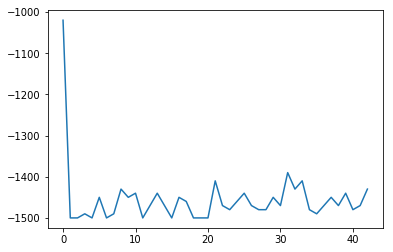

In [29]:
plot_rewards("rewards_hover_07.txt")

* 把 Actor 的Adam学习率提高到0.001

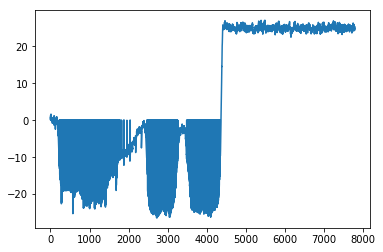

In [30]:
plot_action_cruve("actions_hover_08.txt")

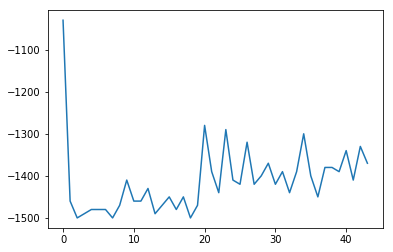

In [31]:
plot_rewards("rewards_hover_08.txt")

* lr再调到 0.0005

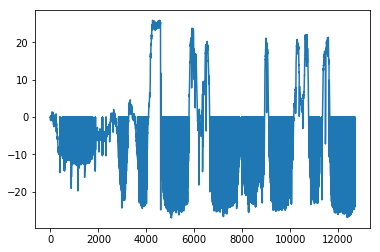

In [32]:
plot_action_cruve("actions_hover_09.txt")

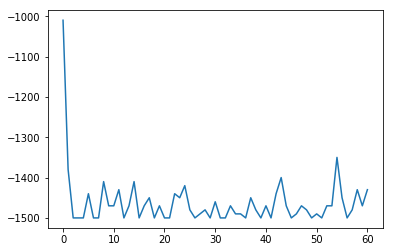

In [33]:
plot_rewards("rewards_hover_09.txt")

* Actor结构：400-300（2层）  

* Critic结构：400-300 + 300

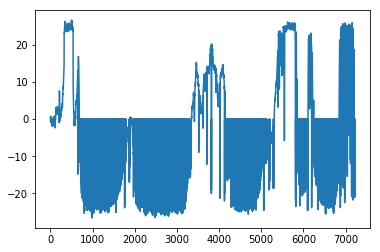

In [34]:
plot_action_cruve("actions_hover_10.txt")

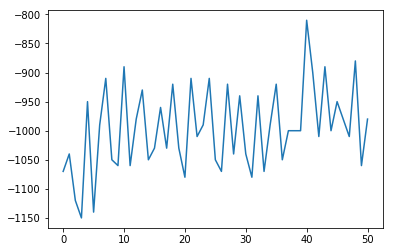

In [35]:
plot_rewards("rewards_hover_10.txt")

* 给Crtic的hidden 加上l2正则化，系数10(-5)

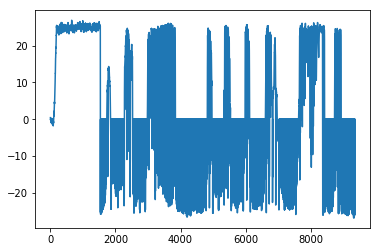

In [39]:
plot_action_cruve("actions_hover_11.txt")

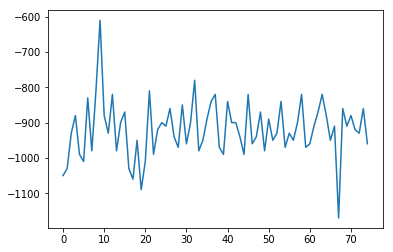

In [40]:
plot_rewards("rewards_hover_11.txt")

目前的优化器：Adam:Actor(0.0005),Critic(0.001)
* 改为Adadelta

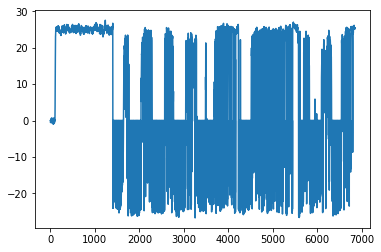

In [41]:
plot_action_cruve("actions_hover_12.txt")

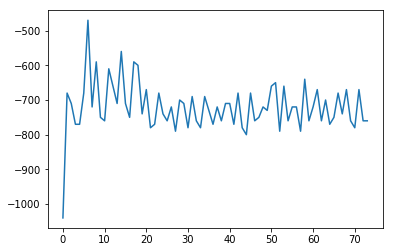

In [42]:
plot_rewards("rewards_hover_12.txt")

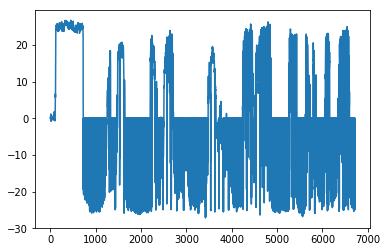

In [43]:
plot_action_cruve("actions_hover_13.txt")

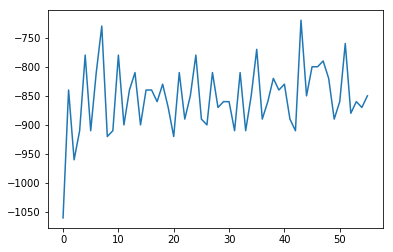

In [44]:
plot_rewards("rewards_hover_13.txt")

#### 重新调整奖励函数  

```
done = False
        
        reward=-min(abs(self.target_z-pose.position.z),5)
        
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2+5
            self.target_hit+=1
            
        if pose.position.z > self.height_limit:
            reward-=500
            done=True
        if timestamp > self.max_duration:
            done=True
```

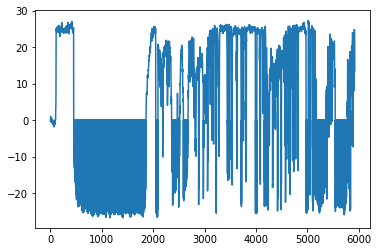

In [48]:
plot_action_cruve("actions_hover_14.txt")

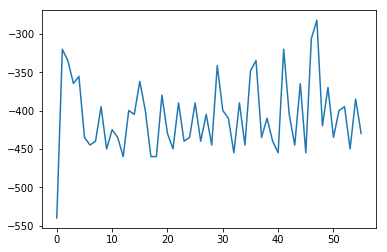

In [49]:
plot_rewards("rewards_hover_14.txt")

* Actor用Adam（0.0005）; Critic用Adadelta

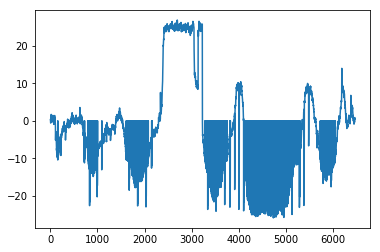

In [52]:
plot_action_cruve("actions_hover_16.txt")

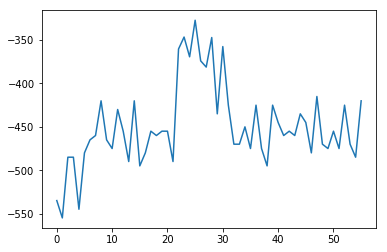

In [53]:
plot_rewards("rewards_hover_16.txt")

* Actor用Adam（0.0001）; Critic用Adadelta

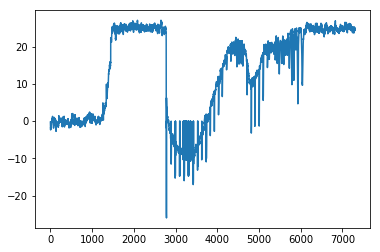

In [54]:
plot_action_cruve("actions_hover_17.txt")

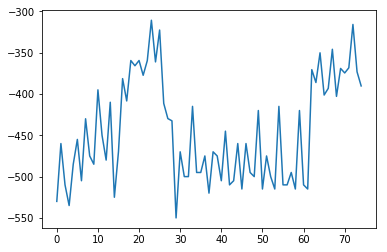

In [55]:
plot_rewards("rewards_hover_17.txt")